### Que pedo mi sckalas

Primero hacemos la conexion a mongo

In [1]:
import pymongo
from pymongo import MongoClient

In [2]:
# Connect to MongoDB
client = MongoClient('mongodb://mongodb:27017/')
db = client['spotify']

# Collections
artists_collection = db['artists']
tracks_collection = db['tracks']

## Busquedas de los artistas

In [3]:
# 1. Find one artist document with specified fields
artist = artists_collection.find_one({}, {"name": 1, "popularity": 1, "followers.total": 1, "genres": 1, "_id": 0})
print("1. One artist document:", artist)

1. One artist document: {'followers': {'total': 13154}, 'genres': ['nz reggae'], 'name': 'Corrella', 'popularity': 41}


In [4]:
# 2. Find all artists with popularity greater than 70, projecting specific fields
popular_artists = artists_collection.find(
    {"popularity": {"$gt": 70}},
    {"name": 1, "popularity": 1, "_id": 0}
)
print("artistas con popularidad mayor a 70")
for artist in popular_artists:
    print(artist)

artistas con popularidad mayor a 70
{'name': 'Robin Schulz', 'popularity': 75}
{'name': 'Lil Nas X', 'popularity': 73}
{'name': 'Jack Harlow', 'popularity': 78}
{'name': 'Tyler, The Creator', 'popularity': 83}
{'name': 'Hotel Ugly', 'popularity': 73}
{'name': 'Connor Price', 'popularity': 72}
{'name': 'Bob Marley & The Wailers', 'popularity': 79}
{'name': 'Travis Scott', 'popularity': 91}
{'name': 'Bruno Mars', 'popularity': 86}
{'name': 'Glass Animals', 'popularity': 73}
{'name': 'TOTO', 'popularity': 73}
{'name': 'Logic', 'popularity': 71}
{'name': 'Joji', 'popularity': 76}
{'name': 'Dominic Fike', 'popularity': 76}
{'name': 'Macklemore', 'popularity': 76}
{'name': 'Major Lazer', 'popularity': 74}
{'name': 'The Chainsmokers', 'popularity': 79}
{'name': 'Kendrick Lamar', 'popularity': 91}
{'name': 'The Notorious B.I.G.', 'popularity': 74}
{'name': 'Anderson .Paak', 'popularity': 74}
{'name': 'Snoop Dogg', 'popularity': 79}
{'name': 'Gucci Mane', 'popularity': 74}
{'name': 'Pharrell Wi

In [5]:
# 3. Find artists belonging to the genre 'pop rap', projecting specific fields
pop_rap_artists = artists_collection.find(
    {"genres": "pop rap"},
    {"name": 1, "genres": 1, "_id": 0}
)
print("3. Artists with genre 'pop rap':")
for artist in pop_rap_artists:
    print(artist)

3. Artists with genre 'pop rap':
{'genres': ['deep underground hip hop', 'kentucky hip hop', 'pop rap', 'rap'], 'name': 'Jack Harlow'}
{'genres': ['deep underground hip hop', 'indie pop rap', 'pop rap'], 'name': 'KYLE'}
{'genres': ['conscious hip hop', 'hip hop', 'pop rap', 'rap'], 'name': 'Logic'}
{'genres': ['pop rap', 'seattle hip hop'], 'name': 'Macklemore'}
{'genres': ['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap'], 'name': 'Snoop Dogg'}
{'genres': ['atl hip hop', 'dirty south rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'Gucci Mane'}
{'genres': ['hip hop', 'pittsburgh rap', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'Wiz Khalifa'}
{'genres': ['hip hop', 'north carolina hip hop', 'pop rap', 'rap', 'trap'], 'name': 'DaBaby'}
{'genres': ['dance pop', 'dancehall', 'pop', 'pop rap'], 'name': 'Sean Paul'}
{'genres': ['hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'French Montana'}
{'genres': ['hip hop',

In [6]:
# 4. Find artists with more than 1 million followers, projecting specific fields
million_followers_artists = artists_collection.find(
    {"followers.total": {"$gt": 1000000}},
    {"name": 1, "followers.total": 1, "_id": 0}
)
print("4. Artists with more than 1 million followers:")
for artist in million_followers_artists:
    print(artist)

4. Artists with more than 1 million followers:
{'followers': {'total': 3081383}, 'name': 'Robin Schulz'}
{'followers': {'total': 12400949}, 'name': 'Lil Nas X'}
{'followers': {'total': 3788500}, 'name': 'Jack Harlow'}
{'followers': {'total': 15079701}, 'name': 'Tyler, The Creator'}
{'followers': {'total': 1068645}, 'name': 'KYLE'}
{'followers': {'total': 1331094}, 'name': 'Connor Price'}
{'followers': {'total': 12238214}, 'name': 'Bob Marley & The Wailers'}
{'followers': {'total': 29627482}, 'name': 'Travis Scott'}
{'followers': {'total': 2848581}, 'name': 'Calle 13'}
{'followers': {'total': 55616780}, 'name': 'Bruno Mars'}
{'followers': {'total': 4112265}, 'name': 'Glass Animals'}
{'followers': {'total': 4145437}, 'name': 'BoyWithUke'}
{'followers': {'total': 1268026}, 'name': 'Men At Work'}
{'followers': {'total': 2912859}, 'name': 'TOTO'}
{'followers': {'total': 6036025}, 'name': 'Logic'}
{'followers': {'total': 1143227}, 'name': 'Surf Curse'}
{'followers': {'total': 9509331}, 'name

In [7]:
# 5. Count the number of artists in the collection
artist_count = artists_collection.count_documents({})
print("Numero total de artistas:", artist_count)

Numero total de artistas: 228


## Busquedas de canciones

In [8]:
# 1. Find one track document with specified fields
track = tracks_collection.find_one({}, {"track_name": 1, "artist_name": 1, "album_name": 1, "_id": 0})
print("Como se ve un documento", track)

Como se ve un documento {'track_name': 'Down', 'artist_name': 'Marian Hill', 'album_name': 'ACT ONE'}


In [9]:
# 2. Find all tracks by 'Pink Floyd'
pink_floyd_tracks = tracks_collection.find(
    {"artist_name": "Pink Floyd"},
    {"track_name": 1, "album_name": 1, "_id": 0}
)
print("Canciones de Pinkfloyd")
for track in pink_floyd_tracks:
    print(track)

Canciones de Pinkfloyd


In [10]:
# 3. Find all tracks in the album 'The Wall', projecting specific fields
the_wall_tracks = tracks_collection.find(
    {"album_name": "The Wall"},
    {"track_name": 1, "artist_name": 1, "_id": 0}
)
print("Canciones que esten en el album The Wall")
for track in the_wall_tracks:
    print(track)

Canciones que esten en el album The Wall


In [11]:
# 4. Count the number of tracks by 'Pink Floyd'
pink_floyd_track_count = tracks_collection.count_documents({"artist_name": "Pink Floyd"})
print("numero de canciones de Pink Floyd", pink_floyd_track_count)

numero de canciones de Pink Floyd 0


In [12]:
# 5. Find all tracks with track name containing 'Comfortably', projecting specific fields
comfortably_tracks = tracks_collection.find(
    {"track_name": {"$regex": "Comfortably"}},
    {"track_name": 1, "artist_name": 1, "album_name": 1, "_id": 0}
)
print("Canciones que contengan la palabra Comfortably")
for track in comfortably_tracks:
    print(track)

Canciones que contengan la palabra Comfortably


## Ahora vamos a ver algunas grafiquitas

In [13]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt

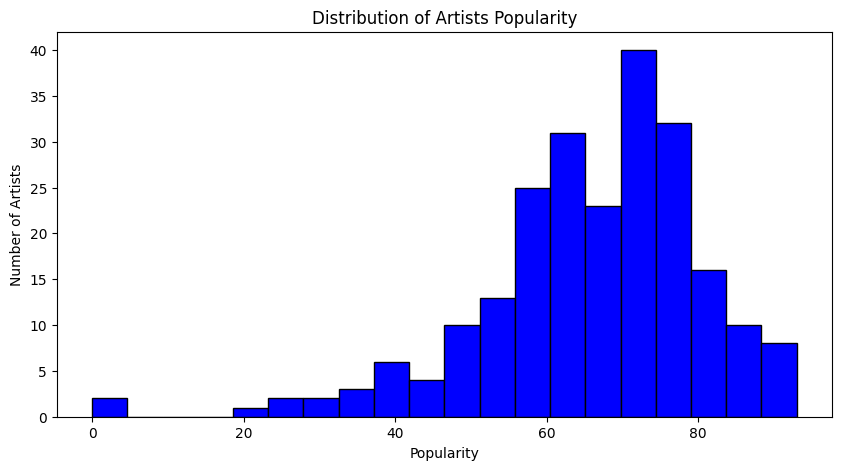

In [14]:
# Fetch data for the plots
artists_data = artists_collection.find({}, {"popularity": 1, "genres": 1, "_id": 0})
tracks_data = tracks_collection.find({}, {"artist_name": 1, "_id": 0})

# Prepare data for plotting
artist_popularity = []
genre_counts = {}

for artist in artists_data:
    artist_popularity.append(artist['popularity'])
    for genre in artist.get('genres', []):
        if genre not in genre_counts:
            genre_counts[genre] = 0
        genre_counts[genre] += 1

# Plot the distribution of artists' popularity
plt.figure(figsize=(10, 5))
plt.hist(artist_popularity, bins=20, color='blue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.title('Distribution of Artists Popularity')
plt.show()

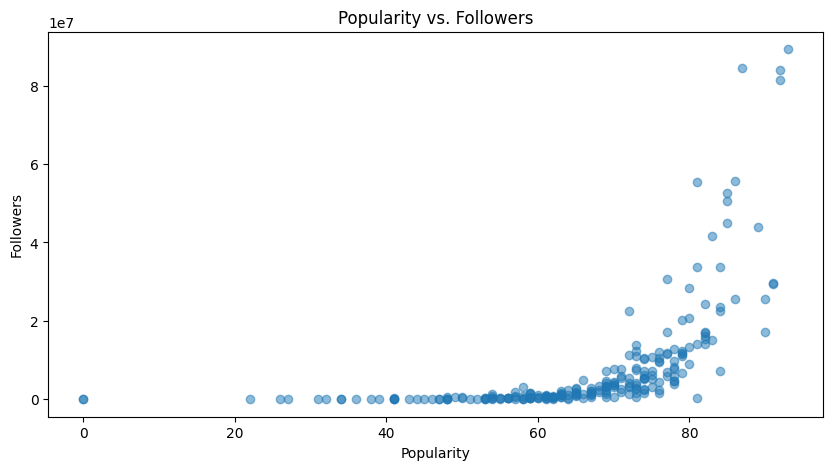

In [15]:
# Fetch data for the plots
artists_data = artists_collection.find({}, {"popularity": 1, "followers.total": 1, "genres": 1, "_id": 0})
tracks_data = tracks_collection.find({}, {"artist_name": 1, "_id": 0})

# Prepare data for plotting
artist_popularity = []
artist_followers = []
genre_counts = {}

for artist in artists_data:
    artist_popularity.append(artist['popularity'])
    artist_followers.append(artist['followers']['total'])
    for genre in artist.get('genres', []):
        if genre not in genre_counts:
            genre_counts[genre] = 0
        genre_counts[genre] += 1

# Scatter plot of popularity vs. followers
plt.figure(figsize=(10, 5))
plt.scatter(artist_popularity, artist_followers, alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.title('Popularity vs. Followers')
plt.show()